# Figure 2: Distribution of Jacobian matrix elements

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import distributions
import statistics
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import random
import sympy as sp
import os
import argparse
from scipy.signal import argrelextrema
from sympy.utilities import lambdify
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats 

n = 2 case

In [3]:
path2 = '/Users/aibekk99/Desktop/publication/code/2x2tr.csv'
df2 = pd.read_csv(path2)
df2.head()

,First Entry,Second Entry,Third Entry,Fourth Entry
0,0.105125,-0.034808,1.789175,-0.471726
1,0.194937,-0.257030,1.598743,-0.943998
2,0.066236,-0.059841,0.848689,-0.259751
3,0.304850,-0.395355,1.528574,-0.584712
4,0.125374,-0.291609,1.131442,-0.624166


In [4]:
# fitting distributions
entry1 = df2['First Entry']
entry2 = df2['Second Entry']
entry3 = df2['Third Entry']
entry4 = df2['Fourth Entry']

def fitter(entry):
    f = Fitter(np.array(entry, dtype=float),
           distributions=['gamma',
                          'lognorm',
                          "expon",
                          "beta",
                          "burr",
                          "norm",
                          "uniform",
                          "cauchy",
                          "chi",
                          "erlang"
                          "levy",
                          "rayleigh"])
    f.fit()
    fit = f.fitted_param.get('beta', None)
    return fit

#f.fit()
#f.summary()

# beta distribution parameters 
params1 = fitter(entry1)
params2 = fitter(entry2)
params3 = fitter(entry3)
params4 = fitter(entry4)

Fitting 11 distributions: 100%|██████████| 11/11 [00:00<00:00, 64.42it/s]


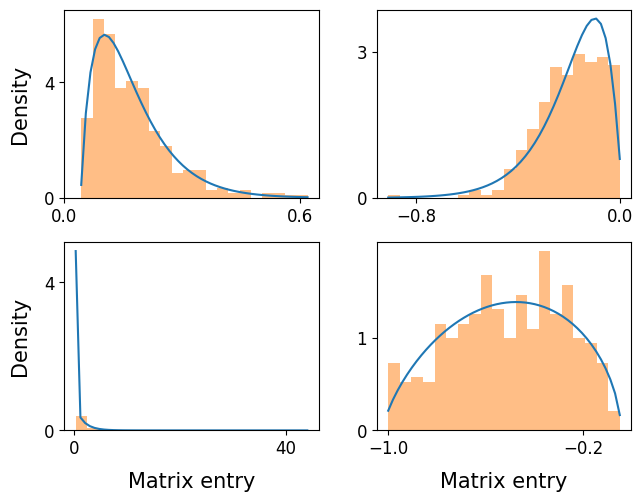

In [7]:

# plotting distributions
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

#axs.set_yscale('log')
x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
axs[0, 0].hist(entry1, density=True, alpha=0.5, bins=20) 
axs[0,0].set_ylabel('Density', fontsize = 15, labelpad = 10)
axs[0,0].tick_params(axis='both', which='major', labelsize=12)
axs[0,0].set_xticks([0,0.6])
axs[0,0].set_yticks([0,4])
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
#axs[0,1].set_xticks([-0.8,-0.4,0])
axs[0, 1].hist(entry2, density=True, alpha=0.5, bins=20) 
axs[0,1].set_xticks([-0.8,0])
axs[0,1].set_yticks([0,3])
axs[0,1].tick_params(axis='both', which='major', labelsize=12)
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[1,0].plot(x3, scipy.stats.beta.pdf(x3, params3[0], params3[1], loc=params3[2], scale=params3[3]),)
axs[1, 0].hist(entry3, density=True, alpha=0.5, bins=20) 
axs[1,0].set_xlabel('Matrix entry', fontsize = 15, labelpad = 10)
axs[1,0].set_ylabel('Density', fontsize = 15, labelpad = 10)
#axs[1,0].set_xticks([0,20,40])
#axs[1,0].set_yticks([0,2,4])
axs[1,0].set_xticks([0,40])
axs[1,0].set_yticks([0,4])
axs[1,0].tick_params(axis='both', which='major', labelsize=12)

#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[1,1].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
axs[1, 1].hist(entry4, density=True, alpha=0.5, bins=20) 
axs[1,1].set_xlabel('Matrix entry', fontsize = 15, labelpad = 10)
#axs[1,1].set_xticks([-1,-0.6,-0.2])
#axs[1,1].set_yticks([0.25,0.75,1.25])
axs[1,1].set_xticks([-1,-0.2])
axs[1,1].set_yticks([0,1])
axs[1,1].tick_params(axis='both', which='major', labelsize=12)


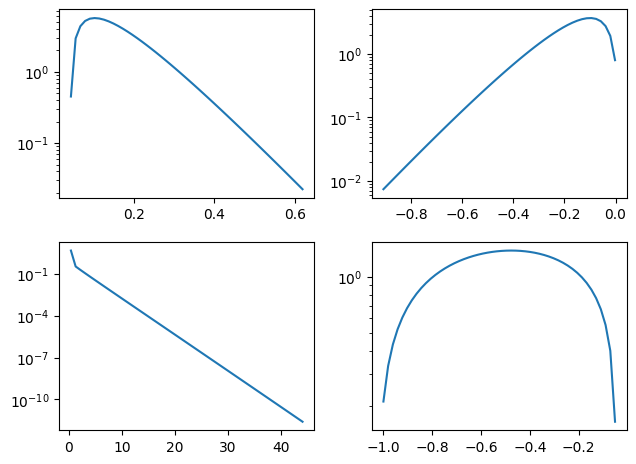

In [23]:
# plotting distributions
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

axs[0, 0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1, 0].set_yscale('log')
axs[1, 1].set_yscale('log')

x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
#axs[0,0].set_xticks([])
#axs[0,0].set_yticks([])
#axs[0,0].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
#axs[0,1].set_xticks([])
#axs[0,1].set_yticks([])
#axs[0,1].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[1,0].plot(x3, scipy.stats.beta.pdf(x3, params3[0], params3[1], loc=params3[2], scale=params3[3]),)
#axs[0,2].set_xticks([])
#axs[0,2].set_yticks([])
#axs[1,0].set_title('Exponential Distribution', fontsize = 10, fontweight = 'bold')
#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[1,1].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
#axs[1,0].set_xticks([])
#axs[1,0].set_yticks([])

n = 3 case

In [62]:
path3 = '/Users/aibekk99/Desktop/repository/code/3x3tr.csv'
df3 = pd.read_csv(path3)
df3.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th
0,-0.855570,0.336615,-1.388665,-1.109516,-0.575818,-0.278495,0.0,-0.394288,0.144589
1,-0.619103,0.114227,-2.321204,-0.608165,-0.358231,-0.182041,0.0,-0.112597,0.037945
2,-0.711263,0.278535,-2.885229,-0.339099,-0.451013,-0.082210,0.0,-0.191499,0.271284
3,-0.417284,0.027201,-1.440551,-0.406664,-0.638343,-0.169712,0.0,-0.229395,0.091770
4,-0.794473,0.203773,-1.263203,-0.269945,-0.329443,-0.303724,0.0,-0.228106,0.028417


In [63]:
# fitting distributions
entry1 = df3['1st']
entry2 = df3['2nd']
entry3 = df3['3rd']
entry4 = df3['4th']
entry5 = df3['5th']
entry6 = df3['6th']
entry7 = df3['7th']
entry8 = df3['8th']
entry9 = df3['9th']

def fitter(entry):
    f = Fitter(np.array(entry, dtype=float),
           distributions=['gamma',
                          'lognorm',
                          "expon",
                          "beta",
                          "burr",
                          "norm",
                          "uniform",
                          "cauchy",
                          "chi",
                          "erlang"
                          "levy",
                          "rayleigh"])
    f.fit()
    fit = f.fitted_param.get('beta', None)
    return fit

#f.fit()
#f.summary()

# beta distribution parameters 
params1 = fitter(entry1)
params2 = fitter(entry2)
params3 = fitter(entry3)
params4 = fitter(entry4)
params5 = fitter(entry5)
params6 = fitter(entry6)
params7 = fitter(entry7)
params8 = fitter(entry8)
params9 = fitter(entry9)

Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED erlanglevy distribution (taking more than 30 seconds)
Fitting 11 distributions: 100%|██████████| 11/11 [00:00<00:00, 66.65it/s]


[]

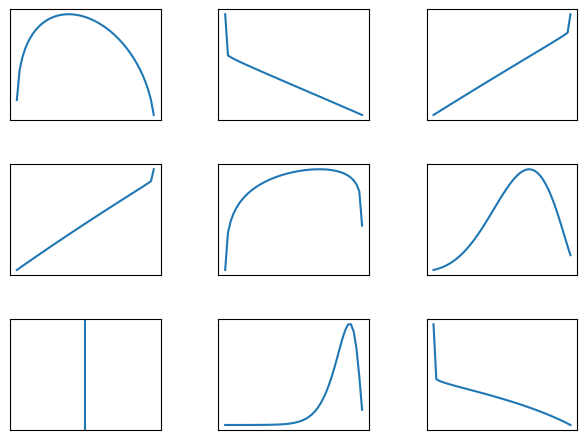

In [64]:
# plotting distributions
fig, axs = plt.subplots(3, 3)
fig.tight_layout()

#axs[0, 0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[0,2].set_yscale('log')
axs[1,0].set_yscale('log')
#axs[1, 1].set_yscale('log')
#axs[1,2].set_yscale('log')
#axs[2, 0].set_yscale('log')
#axs[2, 1].set_yscale('log')
axs[2, 2].set_yscale('log')

x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
#axs[0,0].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[0,2].plot(x3, scipy.stats.beta.pdf(x3, params3[0], params3[1], loc=params3[2], scale=params3[3]),)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
#axs[1,0].set_title('Exponential Distribution', fontsize = 10, fontweight = 'bold')
#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[1,0].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

x5 = np.linspace(np.min(np.array(entry5, dtype=float)), np.max(np.array(entry5, dtype=float)))
axs[1,1].plot(x5, scipy.stats.beta.pdf(x5, params5[0], params5[1], loc=params5[2], scale=params5[3]),)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

x6 = np.linspace(np.min(np.array(entry6, dtype=float)), np.max(np.array(entry6, dtype=float)))
axs[1,2].plot(x6, scipy.stats.beta.pdf(x6, params6[0], params6[1], loc=params6[2], scale=params6[3]),)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

x7 = np.linspace(np.min(np.array(entry7, dtype=float)), np.max(np.array(entry7, dtype=float)))
axs[2,0].plot(x7, scipy.stats.beta.pdf(x7, params7[0], params7[1], loc=params7[2], scale=params7[3]),)
axs[2,0].axvline(x=0)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([])

x8 = np.linspace(np.min(np.array(entry8, dtype=float)), np.max(np.array(entry8, dtype=float)))
axs[2,1].plot(x8, scipy.stats.beta.pdf(x8, params8[0], params8[1], loc=params8[2], scale=params8[3]),)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

x9 = np.linspace(np.min(np.array(entry9, dtype=float)), np.max(np.array(entry9, dtype=float)))
axs[2,2].plot(x9, scipy.stats.beta.pdf(x9, params9[0], params9[1], loc=params9[2], scale=params9[3]),)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])



n = 4 case

In [84]:
path41 = '/Users/aibekk99/Desktop/repository/1/run2/4x4tr_3.csv'
path42 = '/Users/aibekk99/Desktop/repository/1/run1/4x4tr_2.csv'
path43 = '/Users/aibekk99/Desktop/repository/fig2/4x4tr.csv'
df41 = pd.read_csv(path41)
df42 = pd.read_csv(path42)
df43 = pd.read_csv(path43)
merged_df = pd.concat([df41, df42, df43], axis=0, ignore_index=True)

# If you want to drop duplicates based on all columns
#merged_df = merged_df.drop_duplicates()

# Reset index after concatenation
merged_df = merged_df.reset_index(drop=True)
merged_df.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th,13th,14th,15th,16th
0,-0.665428,0.993839,-3.372364,0.0,-0.286931,-0.351050,-0.094748,0.000036,0.0,-0.154479,0.150527,0.0,0.824632,0.0,0.0,-0.163109
1,-0.329136,0.096414,-0.647877,0.0,-0.215740,-0.075832,-0.055554,0.001679,0.0,-0.037620,0.027968,0.0,0.928395,0.0,0.0,-0.300936
2,-0.157161,0.167150,-0.667993,0.0,-0.389232,-0.434348,-0.186340,0.008612,0.0,-0.015824,0.005377,0.0,0.003388,0.0,0.0,-0.352870
3,-0.382790,0.334081,-0.393022,0.0,-0.393328,-0.522331,-0.267203,0.001496,0.0,-0.528800,0.007879,0.0,0.676383,0.0,0.0,-0.383127
4,-0.540370,0.075206,-3.363857,0.0,-0.739573,-0.354815,-0.652564,0.002236,0.0,-0.001830,0.002300,0.0,0.647154,0.0,0.0,-0.768861


In [77]:
print(merged_df['13th'])

0      0.824632
1      0.928395
2      0.003388
3      0.676383
4      0.647154
         ...   
261    0.127453
262    0.052845
263    0.593697
264    0.225812
265    0.032984
Name: 13th, Length: 266, dtype: float64


In [89]:
# fitting distributions
entry1 = merged_df['1st']
entry2 = merged_df['2nd']
entry3 = merged_df['3rd']
entry4 = merged_df['4th']
entry5 = merged_df['5th']
entry6 = merged_df['6th']
entry7 = merged_df['7th']
entry8 = merged_df['8th']
entry9 = merged_df['9th']
entry10 = merged_df['10th']
entry11 = merged_df['11th']
entry12 = merged_df['12th']
entry13 = merged_df['13th']
entry14 = merged_df['14th']
entry15 = merged_df['15th']
entry16 = merged_df['16th']

def fitter(entry):
    f = Fitter(np.array(entry, dtype=float),
           distributions=['gamma',
                          'lognorm',
                          "expon",
                          "beta",
                          "burr",
                          "norm",
                          "uniform",
                          "cauchy",
                          "chi",
                          "erlang"
                          "levy",
                          "rayleigh"])
    f.fit()
    fit = f.fitted_param.get('beta', None)
    return fit

#f.fit()
#f.summary()

# beta distribution parameters 
params1 = fitter(entry1)
params2 = fitter(entry2)
params3 = fitter(entry3)
params4 = fitter(entry4)
params5 = fitter(entry5)
params6 = fitter(entry6)
params7 = fitter(entry7)
params8 = fitter(entry8)
params9 = fitter(entry9)
params10 = fitter(entry10)
params11 = fitter(entry11)
params12 = fitter(entry12)
params13 = fitter(entry13)
params14 = fitter(entry14)
params15 = fitter(entry15)
params16 = fitter(entry16)

Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED erlanglevy distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED erlanglevy distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED erlanglevy distribution (taking more than 30 seconds)
Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED erlanglevy distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED erlanglevy distribution (taking more than 30 seconds)
Fitting 11 distributions: 100%|██████████| 11/11 [00:00<00:00, 61.76it/s]


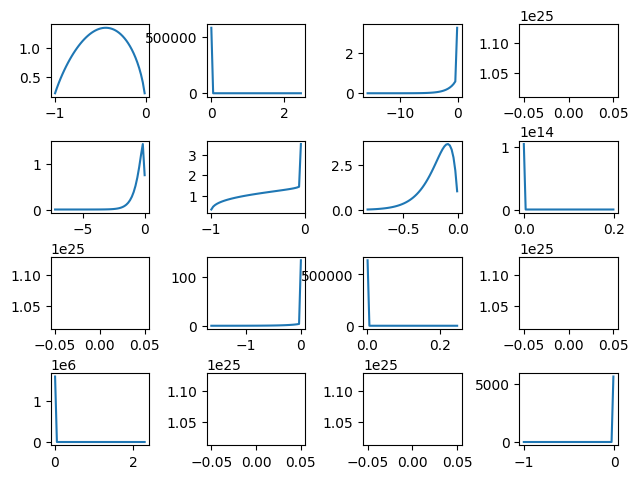

In [39]:
# plotting distributions
fig, axs = plt.subplots(4, 4)
fig.tight_layout()

#axs[0, 0].set_yscale('log')
#axs[0,1].set_yscale('log')
#axs[0, 2].set_yscale('log')
#axs[1, 0].set_yscale('log')
#axs[1, 1].set_yscale('log')
#axs[1,2].set_yscale('log')
#axs[2, 0].set_yscale('log')
#axs[2, 1].set_yscale('log')
#axs[2, 2].set_yscale('log')

x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
#axs[0,0].set_xticks([])
#axs[0,0].set_yticks([])
#axs[0,0].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
#axs[0,1].set_xticks([])
#axs[0,1].set_yticks([])
#axs[0,1].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[0,2].plot(x3, scipy.stats.beta.pdf(x3, params3[0], params3[1], loc=params3[2], scale=params3[3]),)
#axs[0,2].set_xticks([])
#axs[0,2].set_yticks([])
#axs[1,0].set_title('Exponential Distribution', fontsize = 10, fontweight = 'bold')
#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[0,3].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
#axs[1,0].set_xticks([])
#axs[1,0].set_yticks([])
x5 = np.linspace(np.min(np.array(entry5, dtype=float)), np.max(np.array(entry5, dtype=float)))
axs[1,0].plot(x5, scipy.stats.beta.pdf(x5, params5[0], params5[1], loc=params5[2], scale=params5[3]),)
x6 = np.linspace(np.min(np.array(entry6, dtype=float)), np.max(np.array(entry6, dtype=float)))
axs[1,1].plot(x6, scipy.stats.beta.pdf(x6, params6[0], params6[1], loc=params6[2], scale=params6[3]),)
x7 = np.linspace(np.min(np.array(entry7, dtype=float)), np.max(np.array(entry7, dtype=float)))
axs[1,2].plot(x7, scipy.stats.beta.pdf(x7, params7[0], params7[1], loc=params7[2], scale=params7[3]),)
#axs[1,3].axvline(x=0)
x8 = np.linspace(np.min(np.array(entry8, dtype=float)), np.max(np.array(entry8, dtype=float)))
axs[1,3].plot(x8, scipy.stats.beta.pdf(x8, params8[0], params8[1], loc=params8[2], scale=params8[3]),)
x9 = np.linspace(np.min(np.array(entry9, dtype=float)), np.max(np.array(entry9, dtype=float)))
axs[2,0].plot(x9, scipy.stats.beta.pdf(x9, params9[0], params9[1], loc=params9[2], scale=params9[3]),)

x10 = np.linspace(np.min(np.array(entry10, dtype=float)), np.max(np.array(entry10, dtype=float)))
axs[2,1].plot(x10, scipy.stats.beta.pdf(x10, params10[0], params10[1], loc=params10[2], scale=params10[3]),)

x11 = np.linspace(np.min(np.array(entry11, dtype=float)), np.max(np.array(entry11, dtype=float)))
axs[2,2].plot(x11, scipy.stats.beta.pdf(x11, params11[0], params11[1], loc=params11[2], scale=params11[3]),)

x12 = np.linspace(np.min(np.array(entry12, dtype=float)), np.max(np.array(entry12, dtype=float)))
axs[2,3].plot(x12, scipy.stats.beta.pdf(x12, params12[0], params12[1], loc=params12[2], scale=params12[3]),)

x13 = np.linspace(np.min(np.array(entry13, dtype=float)), np.max(np.array(entry13, dtype=float)))
axs[3,0].plot(x13, scipy.stats.beta.pdf(x13, params13[0], params13[1], loc=params13[2], scale=params13[3]),)

x14 = np.linspace(np.min(np.array(entry14, dtype=float)), np.max(np.array(entry14, dtype=float)))
axs[3,1].plot(x14, scipy.stats.beta.pdf(x14, params14[0], params14[1], loc=params14[2], scale=params14[3]),)

x15 = np.linspace(np.min(np.array(entry15, dtype=float)), np.max(np.array(entry15, dtype=float)))
axs[3,2].plot(x15, scipy.stats.beta.pdf(x15, params15[0], params15[1], loc=params15[2], scale=params15[3]),)

x16 = np.linspace(np.min(np.array(entry16, dtype=float)), np.max(np.array(entry16, dtype=float)))
axs[3,3].plot(x16, scipy.stats.beta.pdf(x16, params16[0], params16[1], loc=params16[2], scale=params16[3]),)

[]

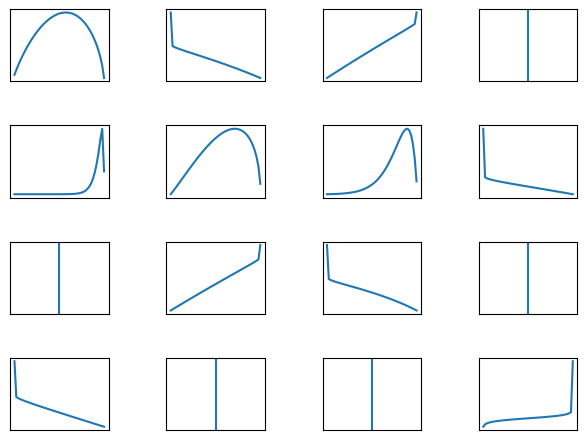

In [92]:
# plotting distributions
fig, axs = plt.subplots(4, 4)
fig.tight_layout()

#axs[0, 0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[0, 2].set_yscale('log')
axs[1, 3].set_yscale('log')
axs[2, 1].set_yscale('log')
axs[2,2].set_yscale('log')
axs[3, 0].set_yscale('log')
axs[3, 3].set_yscale('log')
#axs[2, 2].set_yscale('log')

x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
#axs[0,0].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[0,2].plot(x3, scipy.stats.beta.pdf(x3, params3[0], params3[1], loc=params3[2], scale=params3[3]),)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
#axs[1,0].set_title('Exponential Distribution', fontsize = 10, fontweight = 'bold')
#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[0,3].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
axs[0,3].axvline(x=0)
axs[0,3].set_xticks([])
axs[0,3].set_yticks([])

x5 = np.linspace(np.min(np.array(entry5, dtype=float)), np.max(np.array(entry5, dtype=float)))
axs[1,0].plot(x5, scipy.stats.beta.pdf(x5, params5[0], params5[1], loc=params5[2], scale=params5[3]),)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

x6 = np.linspace(np.min(np.array(entry6, dtype=float)), np.max(np.array(entry6, dtype=float)))
axs[1,1].plot(x6, scipy.stats.beta.pdf(x6, params6[0], params6[1], loc=params6[2], scale=params6[3]),)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

x7 = np.linspace(np.min(np.array(entry7, dtype=float)), np.max(np.array(entry7, dtype=float)))
axs[1,2].plot(x7, scipy.stats.beta.pdf(x7, params7[0], params7[1], loc=params7[2], scale=params7[3]),)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

x8 = np.linspace(np.min(np.array(entry8, dtype=float)), np.max(np.array(entry8, dtype=float)))
axs[1,3].plot(x8, scipy.stats.beta.pdf(x8, params8[0], params8[1], loc=params8[2], scale=params8[3]),)
axs[1,3].set_xticks([])
axs[1,3].set_yticks([])

x9 = np.linspace(np.min(np.array(entry9, dtype=float)), np.max(np.array(entry9, dtype=float)))
axs[2,0].plot(x9, scipy.stats.beta.pdf(x9, params9[0], params9[1], loc=params9[2], scale=params9[3]),)
axs[2,0].axvline(x=0)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([])

x10 = np.linspace(np.min(np.array(entry10, dtype=float)), np.max(np.array(entry10, dtype=float)))
axs[2,1].plot(x10, scipy.stats.beta.pdf(x10, params10[0], params10[1], loc=params10[2], scale=params10[3]),)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

x11 = np.linspace(np.min(np.array(entry11, dtype=float)), np.max(np.array(entry11, dtype=float)))
axs[2,2].plot(x11, scipy.stats.beta.pdf(x11, params11[0], params11[1], loc=params11[2], scale=params11[3]),)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

x12 = np.linspace(np.min(np.array(entry12, dtype=float)), np.max(np.array(entry12, dtype=float)))
axs[2,3].plot(x12, scipy.stats.beta.pdf(x12, params12[0], params12[1], loc=params12[2], scale=params12[3]),)
axs[2,3].axvline(x=0)
axs[2,3].set_xticks([])
axs[2,3].set_yticks([])

x13 = np.linspace(np.min(np.array(entry13, dtype=float)), np.max(np.array(entry13, dtype=float)))
axs[3,0].plot(x13, scipy.stats.beta.pdf(x13, params13[0], params13[1], loc=params13[2], scale=params13[3]),)
#axs[3,0].axvline(x=0)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([])

x14 = np.linspace(np.min(np.array(entry14, dtype=float)), np.max(np.array(entry14, dtype=float)))
axs[3,1].plot(x14, scipy.stats.beta.pdf(x14, params14[0], params14[1], loc=params14[2], scale=params14[3]),)
axs[3,1].axvline(x=0)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

x15 = np.linspace(np.min(np.array(entry15, dtype=float)), np.max(np.array(entry15, dtype=float)))
axs[3,2].plot(x15, scipy.stats.beta.pdf(x15, params15[0], params15[1], loc=params15[2], scale=params15[3]),)
axs[3,2].axvline(x=0)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

x16 = np.linspace(np.min(np.array(entry16, dtype=float)), np.max(np.array(entry16, dtype=float)))
axs[3,3].plot(x16, scipy.stats.beta.pdf(x16, params16[0], params16[1], loc=params16[2], scale=params16[3]),)
axs[3,3].set_xticks([])
axs[3,3].set_yticks([])